In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("avnishnish/mnist-original")

print("Path to dataset files:", path)

100%|██████████| 10.9M/10.9M [00:00<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/avnishnish/mnist-original/versions/1


In [2]:
#Используем scipy.io для чтения файла формата .mat и проверяем его содержимое, чтобы понять, как структурированы данные.

import scipy.io
import numpy as np
import pandas as pd

# Загрузка файла .mat
data_path = path + "/mnist-original.mat"  # Проверить корректность пути
mnist_data = scipy.io.loadmat(data_path)

# Проверка ключей в загруженном файле
print("Ключи данных:", mnist_data.keys())

# Выделим признаки X и целевую переменную y
X = mnist_data['data'].T  # транспонируем данные в ключе 'data' для правильной структуры
y = mnist_data['label'].flatten()  #  Извлечь метки в ключе label'

print("Форма данных X:", X.shape)
print("Форма данных y:", y.shape)

Ключи данных: dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
Форма данных X: (70000, 784)
Форма данных y: (70000,)


In [3]:
#Данные выгрузились, выполним нормализацию признаков и разделим их на тренировочную и тестовую выборки.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Тренировочная выборка:", X_train.shape, y_train.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)

Тренировочная выборка: (49000, 784) (49000,)
Тестовая выборка: (21000, 784) (21000,)


In [ ]:
#Первый классификатор Gradient Boosting:

from sklearn.ensemble import GradientBoostingClassifier

# Уменьшение тренировочной выборки
X_train_small = X_train[:5000]  # Беру первые 5000 примеров, потому что на полных данных очень долго грузится
y_train_small = y_train[:5000]

# Обучение Gradient Boosting на сокращенной выборке
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3)  # Можно задать параметры
gb_clf.fit(X_train_small, y_train_small)

# Предсказания
y_pred_gb = gb_clf.predict(X_test)

# Оценка модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Точность Gradient Boosting (сокращенная выборка): {accuracy_gb:.2f}")

# Вывод: на полных данных думает очень долго,даже не стала дожидаться окончания загрузки
# уменьшила количество данных до 5 000, снизила количество деревьев до 100(n_estimators=100)
# ограничила глубину max_depth=3, чтобы ускорить обучение

# Вывод: сокращённая выборка дала точность 0,92, что хорошо. Существенный минус - думал 5 мин 45 секунд.

# ПОПРОБОВАТЬ СНОВА ПОИГРАТЬ С ПАРАМЕТРАМИ



In [4]:
# Второй классификатор AdaBoostClassifier

import scipy.io

# Загрузка данных из файла mnist-original.mat
data_path = path + "/mnist-original.mat"  # Замените на путь к вашему файлу
mnist_data = scipy.io.loadmat(data_path)

# Выделение признаков X и меток y
X = mnist_data['data'].T  # Транспонирование для правильной формы
y = mnist_data['label'].flatten()  # Преобразование меток в одномерный массив

print("Форма данных X:", X.shape)
print("Форма меток y:", y.shape)


Форма данных X: (70000, 784)
Форма меток y: (70000,)


In [5]:
# Данные подтягиваются, масштабирую данные: Теперь данные X можно масштабировать, чтобы модель работала с нормализованными значениями

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# импортирую библиотеку для тренировочной и тестовой модели

from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Уменьшение тренировочной выборки
X_train_small = X_train[:5000]  # Возьмём первые 5000 примеров, чтобы уж как в первом классификаторе
y_train_small = y_train[:5000]

# Обучение модели AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_small, y_train_small)

# Предсказания
y_pred_ada = ada_clf.predict(X_test)

# Оценка модели
from sklearn.metrics import accuracy_score
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Точность AdaBoost: {accuracy_ada:.2f}")


# Точность 0,72,
# Вывод: тоже не годится этот классификатор


Точность AdaBoost: 0.72


In [6]:
# Третий классификатор Extra Trees.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Обучение модели Extra Trees
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Используем 100 деревьев
et_clf.fit(X_train_small, y_train_small)  # Используем уменьшенную тренировочную выборку, как в первых двух классификаторах

# Предсказания
y_pred_et = et_clf.predict(X_test)

# Оценка модели
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Точность Extra Trees: {accuracy_et:.2f}")

# Точность 0,94.
# Вывод: супер, и быстро, так и запишем, что этот метод подходит для моего датасета

Точность Extra Trees: 0.94


In [7]:
# Четвёртый классификатор Квадратичный дискриминантный анализ (QDA), который является мощным вероятностным классификатором и подходит для данных с нелинейными разделяющими границами.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Обучение модели QDA
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train_small, y_train_small)  # Используем уменьшенную тренировочную выборку, как и ранее

# Предсказания
y_pred_qda = qda_clf.predict(X_test)

# Оценка модели
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Точность QDA: {accuracy_qda:.2f}")

# Точность 0,58
# Вывод: этот классификатор совершенно не подходит, ещё и ошибки какие-то, но точность показал

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Точность QDA: 0.58


In [8]:
# Пятый классификатор Light Gradient Boosting Machine (LightGBM) — это высокоскоростная библиотека градиентного бустинга,
# которая часто показывает хорошие результаты на больших и сложных наборах данных.

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Обучение модели LightGBM
lgbm_clf = LGBMClassifier(n_estimators=100, max_depth=3, random_state=42)  # Параметры модели
lgbm_clf.fit(X_train_small, y_train_small)  # Используем уменьшенную тренировочную выборку

# Предсказания
y_pred_lgbm = lgbm_clf.predict(X_test)

# Оценка модели
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Точность LightGBM: {accuracy_lgbm:.2f}")

# Точность LightGBM: 0.93
# Вывод: разобраться в полученных данных, накидал мне кучу ворнингов

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 78827
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 538
[LightGBM] [Info] Start training from score -2.269150
[LightGBM] [Info] Start training from score -2.166307
[LightGBM] [Info] Start training from score -2.439551
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.286712
[LightGBM] [Info] Start training from score -2.370864
[LightGBM] [Info] Start training from score -2.304587
[LightGBM] [Info] Start training from score -2.274970
[LightGBM] [Info] Start training from score -2.284745
[LightGBM] [Info] Start training from score -2.349677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Точность LightGBM: 0.93


In [9]:
# Шестой Классификатор K Neighbors (K-Nearest Neighbors) — простой, но мощный алгоритм, который классифицирует объекты на основе расстояния до ближайших соседей.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Обучение модели K Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей
knn_clf.fit(X_train_small, y_train_small)  # Обучение на уменьшенной выборке

# Предсказания
y_pred_knn = knn_clf.predict(X_test)

# Оценка модели
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность K Neighbors: {accuracy_knn:.2f}")

#Вывод:точность 0,90,и довольно быстро

Точность K Neighbors: 0.90


In [10]:
#Седьмой , Классификатор дерева решений (Decision Tree). Этот алгоритм строит иерархическую модель принятия решений
# на основе данных, что делает его интуитивно понятным и мощным инструментом для классификации.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Обучение модели Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Ограничим глубину дерева для предотвращения переобучения
dt_clf.fit(X_train_small, y_train_small)  # Используем уменьшенную тренировочную выборку

# Предсказания
y_pred_dt = dt_clf.predict(X_test)

# Оценка модели
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Точность Decision Tree: {accuracy_dt:.2f}")

#Быстрый, точность 0,67
# Вывод : не годится

Точность Decision Tree: 0.67


In [11]:
# Восьмой классификатор SVM с линейным ядром

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Обучение SVM с линейным ядром
svm_clf = SVC(kernel='linear', random_state=42)  # Используем линейное ядро
svm_clf.fit(X_train_small, y_train_small)  # Обучаем модель на уменьшенной выборке,как всегда

# Предсказания
y_pred_svm = svm_clf.predict(X_test)

# Оценка модели
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Точность SVM (линейное ядро): {accuracy_svm:.2f}")

# Точность 0,91

Точность SVM (линейное ядро): 0.91


In [12]:
# Сравнение всех классификаторов:

import pandas as pd

# Данные о точности моделей
results = {
    "Model": [
        "Gradient Boosting",
        "AdaBoost",
        "Extra Trees",
        "Quadratic Discriminant Analysis",
        "Light Gradient Boosting Machine",
        "K Neighbors",
        "Decision Tree",
        "SVM (Linear Kernel)"
    ],
    "Accuracy": [
        0.92,  # Gradient Boosting
        0.72,  # AdaBoost
        0.94,  # Extra Trees
        0.58,  # QDA
        0.93,  # LightGBM
        0.90,  # K Neighbors
        0.67,  # Decision Tree
        0.91   # SVM (Linear Kernel)
    ]
}

# Создание DataFrame
results_df = pd.DataFrame(results)

# Сортировка моделей по точности
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Вывод таблицы
print("Сравнение классификаторов:")
print(results_df)


Сравнение классификаторов:
                             Model  Accuracy
2                      Extra Trees      0.94
4  Light Gradient Boosting Machine      0.93
0                Gradient Boosting      0.92
7              SVM (Linear Kernel)      0.91
5                      K Neighbors      0.90
1                         AdaBoost      0.72
6                    Decision Tree      0.67
3  Quadratic Discriminant Analysis      0.58


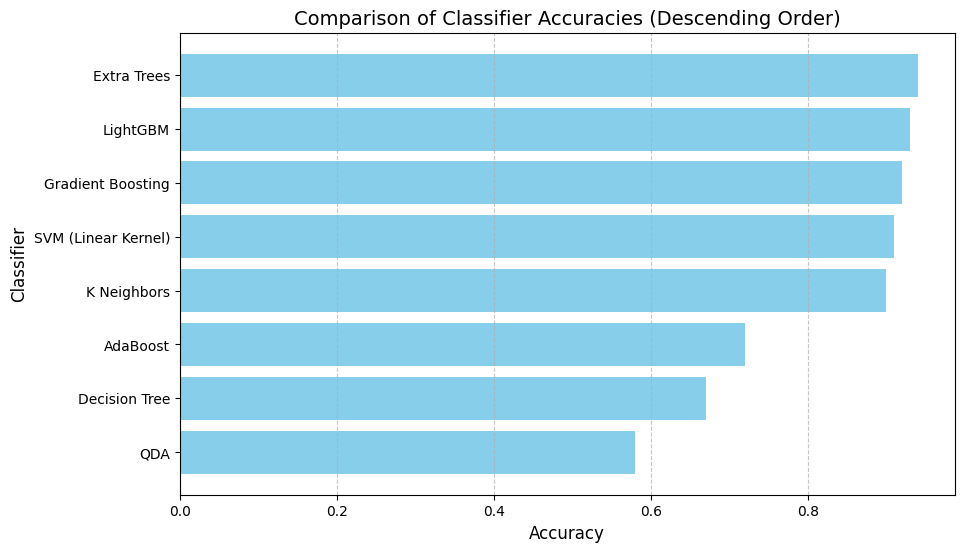

In [13]:
# Визуализация в виде столбчатой диаграммы с сортировкой по убыванию
import matplotlib.pyplot as plt
import pandas as pd

# Данные о точности моделей
results = {
    "Model": [
        "Gradient Boosting",
        "AdaBoost",
        "Extra Trees",
        "QDA",
        "LightGBM",
        "K Neighbors",
        "Decision Tree",
        "SVM (Linear Kernel)"
    ],
    "Accuracy": [0.92, 0.72, 0.94, 0.58, 0.93, 0.90, 0.67, 0.91]
}

# Создание DataFrame и сортировка данных
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Classifier", fontsize=12)
plt.title("Comparison of Classifier Accuracies (Descending Order)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Инвертируем ось Y для удобства чтения

# Показ диаграммы
plt.show()


In [ ]:
# Вывод: Наиболее подходящие классификаторы для моего датасета это Extra Trees,LightGBM, Gradient Boosting и SVM (линейное ядро). \
#Так как в моём датасете содержатся изображения, то эти классификаторы с достаточно высокой точностью смогут распознать
# рукописные цифры на картинке.
#Extra Trees оказался лучшим, благодаря его архитектуре, которая идеально подходит для анализа высокоразмерных данных, таких как пиксели изображений.
#Большая рандомизация и ансамблевый подход, по сравнению с другими классификаторами с высокой точностью.